<a href="https://colab.research.google.com/github/cb190/IS_4487/blob/main/Lab_3_Carson_Braswell.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Day 3 Lab, IS 4487

Outline

Repeat exercises from Lab 2, for practice, but with the *SuperStore Retail Orders* dataset

- Loading installed packages
- Inspect data
- Clean data
- Summarize data
- Explore plot types and search for insights

Please use the Gemini AI tool to get coding ideas.



# Notebook Instructions
- Remember to save a copy of the notebook in Drive so that you can save your changes.
- Complete the Assignment Tasks.
- When you are done revising this notebook save your changes to GitHub and upload the URL for the file to Canvas for the assignment.
- Some of these assignments ask you to do things we have not covered yet.  Use AI to come up with a solution.

# Load Libraries

➡️ Assignment Tasks
- Load Pandas

In [1]:
# your code goes here
import pandas as pd
import matplotlib as mpl
import sklearn as sl

# Load Data

In [2]:
ss = pd.read_csv("https://raw.githubusercontent.com/jefftwebb/is_4487_base/main/Labs/DataSets/superstore_retail_orders.csv")

# Summarize and Review Data

➡️ Assignment Tasks

- Describe or profile the dataframe

In [3]:
# Your code goes here
ss.describe()

,order_id,quantity,product_price
count,56045.000000,56006.000000,56045.000000
mean,61668.066340,3.348498,6195.540505
std,7508.229651,422.646565,35784.727716
min,45079.000000,1.000000,2.290000
25%,55644.000000,1.000000,7.950000
50%,61869.000000,1.000000,475.600000
75%,68097.000000,2.000000,914.620000
max,74147.000000,100000.000000,235481.000000


# Prepare Data

➡️ Assignment Tasks
- Remove rows with empty (NULL) values
- Locate outliers in any of the variables.   Filter them out if they appear to be mistakes; keep them if they are exceptional cases.
- Create a new field: total_purchase. This should be product_price x quantity.

In [4]:
# Drop NAs
ss = ss.dropna()

In [21]:
# Search for and filter outliers
ss_clean = ss

ss_clean = ss_clean[ss_clean['quantity'] < 100];
ss_clean = ss_clean[ss_clean['product_price'] < 1500];

In [22]:
# create total_purchase
ss_clean['total_purchase'] = ss_clean['product_price'] * ss_clean['quantity']

Check that your cleaning worked

In [23]:
# your code goes here
ss_clean.describe()

,order_id,quantity,product_price,total_purchase
count,45664.000000,45664.000000,45664.000000,45664.000000
mean,62434.754402,1.581311,302.721560,387.383051
std,6880.166533,0.623228,357.052967,502.631071
min,45080.000000,1.000000,2.290000,2.290000
25%,56560.000000,1.000000,4.990000,9.980000
50%,62442.000000,2.000000,53.990000,53.990000
75%,68333.000000,2.000000,609.630000,630.090000
max,74147.000000,5.000000,1199.000000,3249.950000


# Summarize Data

➡️ Assignment Tasks
- Calculate the average price per year-month
- Calculate the total revenue per year month

Does more cleaning need to be done? If so, do it and then recreate the above summary tables.

In [32]:
# average price
# Create a copy of the DataFrame to avoid modifying the original
ss_clean1 = ss_clean.copy()

# Convert 'order_date' to datetime if it's not already, handling errors
ss_clean1['order_date'] = pd.to_datetime(ss_clean1['order_date'], errors='coerce')

# Now you can perform the comparison (adjust years as needed)
ss_clean1 = ss_clean1[(ss_clean1['order_date'].dt.year >= 2000) & (ss_clean1['order_date'].dt.year <= 2023)]

ss_clean1.groupby(['order_date'])['product_price'].mean()

order_date
2020-01-01    630.090000
2020-01-05    630.090000
2020-01-07    630.090000
2020-01-08    630.090000
2020-01-13    630.090000
                 ...    
2022-06-26    303.396500
2022-06-27    328.102986
2022-06-28    317.005221
2022-06-29    368.938571
2022-06-30    273.823415
Name: product_price, Length: 777, dtype: float64

In [33]:
# total revenue
ss_clean1.groupby(['order_date'])['total_purchase'].sum()

order_date
2020-01-01     1260.18
2020-01-05      630.09
2020-01-07     1260.18
2020-01-08      630.09
2020-01-13      630.09
                ...   
2022-06-26    64818.83
2022-06-27    63011.73
2022-06-28    52396.09
2022-06-29    53285.05
2022-06-30    14192.52
Name: total_purchase, Length: 777, dtype: float64

# Plot Data

➡️ Assignment Tasks
- Produce two plots that show patterns or relationships in the data.
- Interpret these patterns for potential value to the business.  

<Axes: xlabel='order_date'>

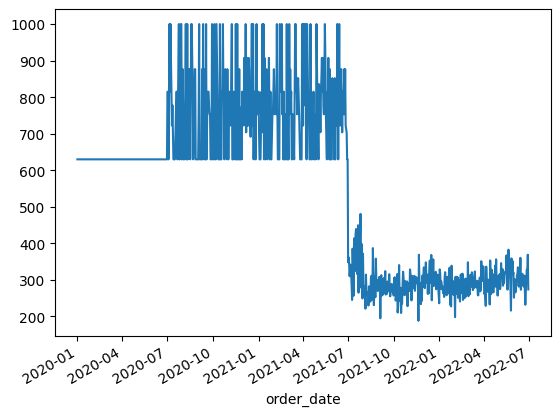

In [47]:
# Your code goes here.  Plot 1
ss_clean1.groupby(['order_date'])['product_price'].mean().plot()

<Axes: xlabel='order_date'>

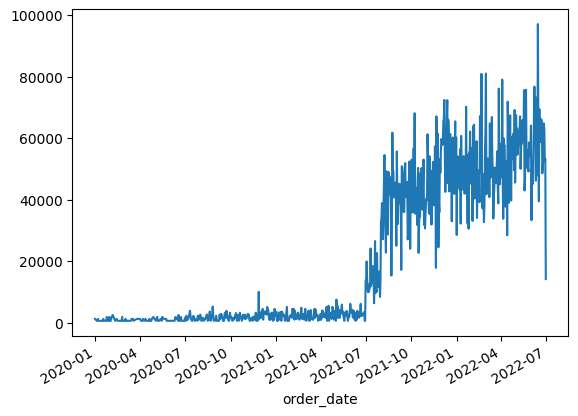

In [44]:
# Your code goes here.  Plot 2
ss_clean1.groupby(['order_date'])['total_purchase'].sum().plot()

Make an interpretive comment.